
# COGS 189: Depression

## Overview
In this project, we ______________.<br>

### EEG Data
For this dataset, we will be using data collected from James F. Cavanagh & John J.B.Allen's Depression Rest (d003) located at the following URL: http://predict.cs.unm.edu/downloads.php.
<br>
***
## Section 1: Setup
We will be importing the following packages: <br>
- numpy
- scipy
- matplotlib
- seaborn
- pandas

In [2]:
import numpy as np                                      # for dealing with data
from scipy.signal import butter, sosfiltfilt, sosfreqz  # for filtering
from scipy.io import loadmat                            # for importing matlab files
import matplotlib.pyplot as plt                         # for plotting
import seaborn as sns                                   # for visualization
import pandas as pd                                     # for importing datasets and handling data

***
## Section 2: Data Cleaning
The dataset we used was broken down into individual MATLAB (.mat) files for each participant. We used MATLAB to convert the files into Comma-separated value (.csv) format. We decided to keep only the EEG data and times for each participant. The files are named according to the participant ID. EEG data files are named only by the participant ID (e.g., "509.csv"), EEG times files have 't' appended to the filename (e.g., "509t.csv").

In [2]:
data_df = pd.read_csv('Data/509_data_6.csv')
times_df = pd.read_csv('Data/509t.csv')

Since each column in the EEG data corresponds to the columns in EEG times, we will use times_df as the column labels for data_df.

In [3]:
data_df.columns=[times_df]

data_df.head()

,0,2,4,6,8,10,12,14,16,18,...,506888,506890,506892,506894,506896,506898,506900,506902,506904,506906
0,-42.48284,-46.31948,-51.36037,-54.47553,-54.11464,-53.90202,-54.85407,-54.40303,-53.71802,-54.37649,...,0,0,0,0,0.0000,9.71704,0.000000,0.000000,0.00,2.452983
1,48.48675,44.48138,42.58455,43.28513,44.06726,41.55170,39.44033,42.32360,43.60525,40.57979,...,0,0,0,0,0.0000,0.00000,0.000148,9.717040,0.00,0.000000
2,-65.25048,-66.15553,-68.49241,-71.37434,-73.33966,-73.69581,-73.61456,-74.31854,-74.32522,-72.89500,...,0,0,0,0,2617.4090,0.00000,0.000000,0.709918,46527.58,2.116113
3,16.57424,15.38467,14.22920,12.94236,12.76103,12.58444,12.35581,12.87979,12.28286,10.40160,...,0,0,0,0,175.3732,34314.64000,0.000000,2.812390,0.00,0.000000
4,-120.97400,-123.59530,-128.45940,-130.62880,-130.72660,-132.59780,-135.11340,-134.28500,-128.96830,-124.42780,...,0,0,0,0,0.0000,0.00000,0.000000,0.000000,0.00,0.000000


***
## Section 3: Data Filtering
In this section, we focus on reformatting and processing the data so that we can have an array of alpha powers for each participant as well as a label (1 if depressed and 0 if otherwise) to signify if a participant was labelled as depressed or not depending on their Beck Depression Test score (> 13).

First, we read in each participant's EEG data as a .csv file (e.g. 509_data.csv) and convert it to a dataframe to process the data later on. We also load in the data for the EEG channels for each person (e.g. participant 509c.csv) and the event timestamps for the participant (e.g. 509e.csv).

In [4]:
num = '509'
data_t = pd.read_csv('Data/' + num +'_data.csv')
channels = pd.read_csv('Data/' + num + 'c.csv')
events = pd.read_csv('Data/' + num + 'e.csv')
events['type'] = events['type'].astype(str)

In [5]:
data_t

,0,2,4,6,8,10,12,14,16,18,...,506888,506890,506892,506894,506896,506898,506900,506902,506904,506906
0,-36.311830,-35.221750,-33.433320,-26.742470,-21.25350,-20.189520,-17.141080,-11.871560,-10.526000,-13.190420,...,0,0,0,0,719.061,0.000000,0.000148,16.311060,-204640.900000,0.00000
1,-14.143950,-15.910290,-16.286300,-12.211390,-7.91615,-6.016363,-3.457663,-0.107496,0.002521,-2.810463,...,0,0,0,0,719.061,0.010972,719.061000,0.000000,0.000148,16.31195
2,1.931665,-0.395882,0.179555,3.381303,5.91969,7.948324,10.617190,12.853400,12.848660,11.716910,...,0,0,0,0,0.000,0.010972,719.061000,0.010972,719.061000,0.00000


Participants were directed to keep their eyes open and close their eyes in ~33 seconds. The events included types 1 to 6 and 11 to 16, where triggers were produced at types 11 to 16. In order to filter the data we will only look at types 11, 13, 15  for events with eyes closed and types 12, 14, 16 for events with open eyes.

In [6]:
eyes_closed = [ '11', '13', '15']
eyes_open = ['12', '14', '16']
fs = 500

The types of events represent the state of the participant(eyes closed/open) and latency indicates the time stamp corresponding for each event. Using the time in events we retrieved the corresponding data for O1, Oz, O2 electrodes for eyes closed or open.

In [7]:
#Get relevent data from events
#TAs code

#eyes closed
dataset_closed_0 = []
dataset_closed_1 = []
dataset_closed_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_closed:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time - 1
        
        loc_1 = data_t.columns.get_loc(str(time))
        
        dataset_closed_0.append(data_t.iloc[0, loc_1])
        dataset_closed_0.append(data_t.iloc[1, loc_1])
        dataset_closed_0.append(data_t.iloc[2, loc_1])
        

#eyes open
dataset_open_0 = []
dataset_open_1 = []
dataset_open_2 = []

for e in range(1, len(events)):
    if events['type'][e] in eyes_open:
        time = int(events['latency'][e])
        if time % 2 == 1:
            time = time - 1
        
        loc_1 = data_t.columns.get_loc(str(time))
        
        dataset_open_0.append(data_t.iloc[0, loc_1])
        dataset_open_0.append(data_t.iloc[1, loc_1])
        dataset_open_0.append(data_t.iloc[2, loc_1])
        

Next, we will plot the raw data for the events where participants closed their eyes and opened their eyes. On the x-axis, we have the data samples for the EEG waves recorded and on the y-axis, we have the amplitude of the EEG waves.

In [8]:
closed_data = dataset_closed_0
open_data = dataset_open_0

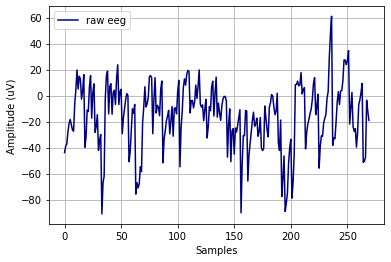

In [9]:
#Eyes closed
a = np.transpose(closed_data)
plt.plot(a, label = "raw eeg", color='navy');
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

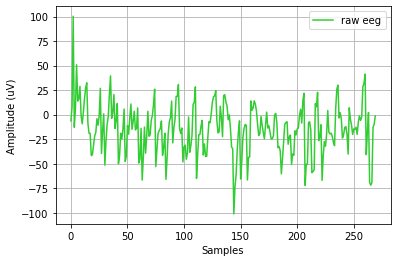

In [10]:
#Open Eyes
a = np.transpose(open_data)
plt.plot(a, label = "raw eeg", color='limegreen');
plt.xlabel('Samples');
plt.ylabel('Amplitude (uV)');
plt.grid(True);
plt.legend(loc = 'best');

Then, we attempted to analyze the data using Fourier Transforms in order to calculate the mean band powers for theta, alpha, beta, and gamma. By getting the values after the Fourier Transformation, we were able to obtain the frequencies at which the events occurred and then look for the values that were within 8 to 12Hz in order to extract the average alpha power for each participant during the events with their eyes closed and eyes open.

In [11]:
data = closed_data

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(closed_data), 1/fs)


# Define EEG bands
eeg_bands = {'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass

data = open_data

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

# Take the max of the fft amplitude for each EEG band
eeg_band_fft_open = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft_open[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass



Text(0, 0.5, 'Mean Band Amplitude')

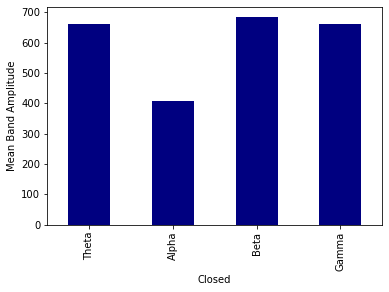

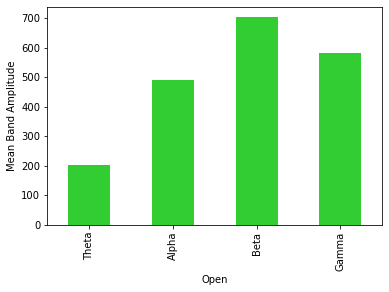

In [12]:
# Plot the data 
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False, color='navy')
ax.set_xlabel("Closed")
ax.set_ylabel("Mean Band Amplitude")

df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft_open[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False, color='limegreen')
ax.set_xlabel("Open")
ax.set_ylabel("Mean Band Amplitude")

After filtering the data for all the participants our data has the following tendency. We included the number that participants had in the original procedure, eeg alpha data for eyes closed and open, and their depression state. In order to determine if the participant had a depression we used the BDI index where participants with BDI greater than 13 were labeled as depressed.

In [13]:
fd = pd.read_csv('Data/Filtered_Data.csv')
fd[:15]

,participant,open,closed,"label (0 for not depressed, 1 for depressed)",BDI
0,509,491.109212,408.343868,0,7
1,519,324.802986,963.380921,0,6
2,542,450.667603,451.559918,0,0
3,545,356.680814,790.636981,0,0
4,546,700.472825,270.410014,0,5
5,550,223.611748,2670.189747,0,1
6,551,625.694546,667.483969,0,2
7,552,172.386131,1302.885171,0,2
8,554,427.850070,1009.747333,0,1
9,555,2421.741571,5179.579306,0,1


Below, the graph demonstrates that the participants have lower alpha values for events with their eyes closed than with events where their eyes are open. This is not the expected trend because alpha values should be much higher when the participants' eyes are closed.

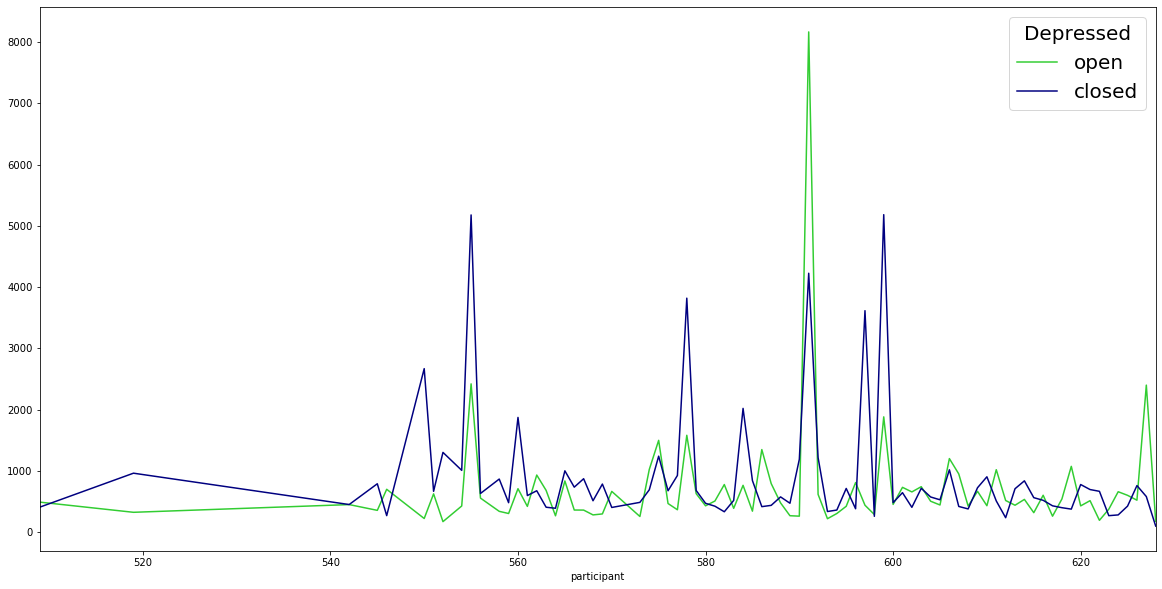

In [14]:
fd.plot(x='participant', y=['open','closed'],figsize=(20,10),color=['limegreen','navy'])

plt.legend(title="Depressed", fontsize=20, title_fontsize=20)

Since the trend is unexpected for this participant, as the alpha power for the events where the participant's eyes were open was higher than the alpha power for the events where their eyes were closed, we chose to inject a sine wave at a frequency of 10Hz and perform Fourier Transformation on this wave in order to demonstrate what the data should look like. The ideal data should have had higher alpha powers for events with closed eyes than events with opened eyes.

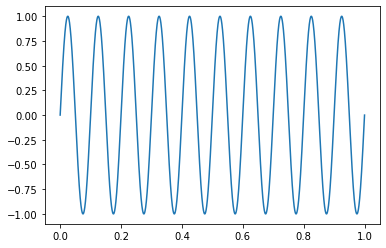

In [15]:
F = 10
T = 10/F
Fs = 5000
Ts = 1./Fs
N = int(T/Ts)

t = np.linspace(0, T, N)
signal = np.sin(2*np.pi*F*t)

plt.plot(t, signal)
plt.show()

In [16]:
data = signal

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))
# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(signal), 1/Fs)


# Define EEG bands
eeg_bands = {'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the max of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands: 
    try:
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq < eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    except ValueError:  #raised if `y` is empty.
        print("entered")
        pass

As the plot demonstrates below, the alpha power is much higher and this is what the expected trend should look like.

Text(0, 0.5, 'Mean band Amplitude')

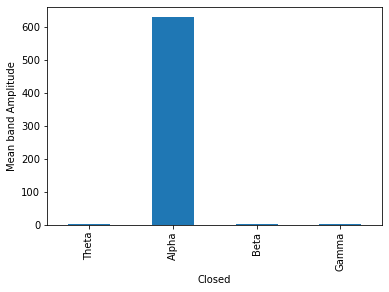

In [17]:
# Plot the data 
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("Closed")
ax.set_ylabel("Mean band Amplitude")

***
## Section 4: Machine Learning
Although our data follows unexpected trends, causing us to doubt the validity of the collected data, we decided to run further machine learning experiments on the real data in order to see how the classifiers would perform, and if the accuracy scores collected will support the literature or if they will support that the data might not be accurate.

3 splits of data: 80/20, 60/40, 50/50 

3 Algorithms: LDA, SVM, KNN 

Parameters for LDA: 3 different solvers - svd, lsqr, eigen

Parameters for SVM: linear kernel, different values of C:  np.logspace(-4, 4, 9)

Parameters for KNN: weights - uniform/distance, k-neighbors - 1 through 10, p value for minkowski metric - 1 and 2

Scaled data for SVM in interests of computation time

In [3]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


# Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Import data
data = pd.read_csv('Data/Filtered_Data.csv')

In [4]:
data.head()

,participant,open,closed,"label (0 for not depressed, 1 for depressed)",BDI
0,509,491.109212,408.343868,0,7
1,519,324.802986,963.380921,0,6
2,542,450.667603,451.559918,0,0
3,545,356.680814,790.636981,0,0
4,546,700.472825,270.410014,0,5


In [5]:
X = data[['open', 'closed']]
Y = data['label (0 for not depressed, 1 for depressed)']

### 80/20 Split of Data

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.20, random_state=42)

In [22]:
print("X_train1: ", X_train1.shape)
print("y_train1: ", y_train1.shape)

X_train1:  (64, 2)
y_train1:  (64,)


In [27]:
# Linear Discriminant Analysis
pipe_LDA = Pipeline([('classifier', LinearDiscriminantAnalysis())])
search_space1 = [{'classifier': [LinearDiscriminantAnalysis()],
                 'classifier__solver': ['svd', 'lsqr', 'eigen']}]
# Create grid search 
clf = GridSearchCV(pipe_LDA, search_space1, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
LDA_model1 = clf.fit(X_train1, y_train1)



# SVM
pipe_SVC = Pipeline([('std', StandardScaler()),
                    ('classifier', SVC())])
search_space2 = [{'classifier': [SVC()],
                 'classifier__kernel': ['linear'],
                 'classifier__C': np.logspace(-4, 4, 9)}]
# Create grid search 
clf2 = GridSearchCV(pipe_SVC, search_space2, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
SVC_model1 = clf2.fit(X_train1, y_train1)



# KNN
pipe_KNN = Pipeline([('classifier', KNeighborsClassifier())])
search_space3 = [{'classifier': [KNeighborsClassifier()],
                 'classifier__weights': ['uniform', 'distance'],
                 'classifier__n_neighbors': [i for i in range(1,11)],
                 'classifier__p': [1, 2]
                }]
# Create grid search 
clf3 = GridSearchCV(pipe_KNN, search_space3, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
KNN_model1 = clf3.fit(X_train1, y_train1)

In [28]:
# Best hyperparameters for LDA
LDA_model1.cv_results_['params'][ np.argmin(LDA_model1.cv_results_['rank_test_score']) ]

{'classifier': LinearDiscriminantAnalysis(solver='lsqr'),
 'classifier__solver': 'lsqr'}

In [29]:
# Best hyperparameters for SVM
SVC_model1.cv_results_['params'][ np.argmin(SVC_model1.cv_results_['rank_test_score']) ]

{'classifier': SVC(C=10.0, kernel='linear'),
 'classifier__C': 10.0,
 'classifier__kernel': 'linear'}

In [30]:
# Best hyperparameters for KNN
KNN_model1.cv_results_['params'][ np.argmin(KNN_model1.cv_results_['rank_test_score']) ]

{'classifier': KNeighborsClassifier(n_neighbors=2, p=1),
 'classifier__n_neighbors': 2,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

In [31]:
# Validation scores for LDA
LDA_model1.cv_results_['mean_test_score']

array([0.61904762, 0.63571429, 0.63571429])

In [32]:
# Best validation score for LDA
LDA_model1.cv_results_['mean_test_score'][ np.argmin(LDA_model1.cv_results_['rank_test_score']) ]

0.6357142857142857

In [33]:
# Validation scores for SVM
SVC_model1.cv_results_['mean_test_score']

array([0.5452381 , 0.5452381 , 0.53095238, 0.60714286, 0.60714286,
       0.62142857, 0.58809524, 0.58809524, 0.58809524])

In [34]:
# Best validation score for SVM
SVC_model1.cv_results_['mean_test_score'][ np.argmin(SVC_model1.cv_results_['rank_test_score']) ]

0.6214285714285714

In [35]:
# Validation scores for KNN
KNN_model1.cv_results_['mean_test_score']

array([0.51666667, 0.51666667, 0.53333333, 0.53333333, 0.58333333,
       0.51666667, 0.51666667, 0.53333333, 0.53333333, 0.56428571,
       0.5       , 0.51666667, 0.5       , 0.51666667, 0.43809524,
       0.53333333, 0.53333333, 0.51904762, 0.4547619 , 0.5047619 ,
       0.37619048, 0.42142857, 0.43809524, 0.4547619 , 0.4547619 ,
       0.44285714, 0.48571429, 0.48809524, 0.45952381, 0.5047619 ,
       0.42142857, 0.55      , 0.52142857, 0.5047619 , 0.53333333,
       0.53571429, 0.52142857, 0.54047619, 0.47380952, 0.52142857])

In [36]:
# Best validation score for KNN
KNN_model1.cv_results_['mean_test_score'][ np.argmin(KNN_model1.cv_results_['rank_test_score']) ]

0.5833333333333334

#### Train best Models

In [23]:
# Scale data for SVM
scaler = StandardScaler()
Xsc_train1 = scaler.fit_transform(X_train1)
Xsc_test1 = scaler.fit_transform(X_test1)

In [24]:
# Best LDA
best_LDA_model1 = LinearDiscriminantAnalysis(solver='lsqr')
best_LDA_model1.fit(X_train1, y_train1)

# Best SVM
best_SVM_model1 = SVC(C=10.0, kernel='linear', max_iter=-1, random_state=None,verbose=False)
best_SVM_model1.fit(Xsc_train1, y_train1)

# Best KNN
best_KNN_model1 = KNeighborsClassifier(n_neighbors=2, p=1,weights='uniform') 
best_KNN_model1.fit(X_train1, y_train1)

# Predictions and accuracy scores
y_pred_LDA1 = best_LDA_model1.predict(X_test1)
y_pred_SVM1 = best_SVM_model1.predict(Xsc_test1)
y_pred_KNN1 = best_KNN_model1.predict(X_test1)

accuracy_LDA1 = accuracy_score(y_pred_LDA1, y_test1)
accuracy_SVM1 = accuracy_score(y_pred_SVM1, y_test1)
accuracy_KNN1 = accuracy_score(y_pred_KNN1, y_test1)

print("Accuracy for LDA: ", accuracy_LDA1)
print("Accuracy for SVM: ", accuracy_SVM1)
print("Accuracy for KNN: ", accuracy_KNN1)

Accuracy for LDA:  0.625
Accuracy for SVM:  0.5625
Accuracy for KNN:  0.6875


### 60/40 Split

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.40, random_state=42)

print("X_train2: ", X_train2.shape)
print("y_train2: ", y_train2.shape)

X_train2:  (48, 2)
y_train2:  (48,)


In [38]:
# Linear Discriminant Analysis
pipe_LDA = Pipeline([('classifier', LinearDiscriminantAnalysis())])
search_space1 = [{'classifier': [LinearDiscriminantAnalysis()],
                 'classifier__solver': ['svd', 'lsqr', 'eigen']}]
# Create grid search 
clf = GridSearchCV(pipe_LDA, search_space1, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
LDA_model2 = clf.fit(X_train2, y_train2)



# SVM
pipe_SVC = Pipeline([('std', StandardScaler()),
                    ('classifier', SVC())])
search_space2 = [{'classifier': [SVC()],
                 'classifier__kernel': ['linear'],
                 'classifier__C': np.logspace(-4, 4, 9)}]
# Create grid search 
clf2 = GridSearchCV(pipe_SVC, search_space2, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
SVC_model2 = clf2.fit(X_train2, y_train2)



# KNN
pipe_KNN = Pipeline([('classifier', KNeighborsClassifier())])
search_space3 = [{'classifier': [KNeighborsClassifier()],
                 'classifier__weights': ['uniform', 'distance'],
                 'classifier__n_neighbors': [i for i in range(1,11)],
                 'classifier__p': [1, 2]
                }]
# Create grid search 
clf3 = GridSearchCV(pipe_KNN, search_space3, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
KNN_model2 = clf3.fit(X_train2, y_train2)

In [39]:
# Best hyperparameters for LDA
LDA_model2.cv_results_['params'][ np.argmin(LDA_model2.cv_results_['rank_test_score']) ]

{'classifier': LinearDiscriminantAnalysis(), 'classifier__solver': 'svd'}

In [40]:
# Best hyperparameters for SVM
SVC_model2.cv_results_['params'][ np.argmin(SVC_model2.cv_results_['rank_test_score']) ]

{'classifier': SVC(C=0.1, kernel='linear'),
 'classifier__C': 0.1,
 'classifier__kernel': 'linear'}

In [41]:
# Best hyperparameters for KNN
KNN_model2.cv_results_['params'][ np.argmin(KNN_model2.cv_results_['rank_test_score']) ]

{'classifier': KNeighborsClassifier(n_neighbors=9, p=1),
 'classifier__n_neighbors': 9,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

In [42]:
# Validation scores for LDA
LDA_model2.cv_results_['mean_test_score']

array([0.62, 0.62, 0.62])

In [43]:
# Best validation score for LDA
LDA_model2.cv_results_['mean_test_score'][ np.argmin(LDA_model2.cv_results_['rank_test_score']) ]

0.62

In [44]:
# Validation scores for SVM
SVC_model2.cv_results_['mean_test_score']

array([0.54, 0.54, 0.54, 0.6 , 0.56, 0.52, 0.52, 0.52, 0.52])

In [45]:
# Best validation score for SVM
SVC_model2.cv_results_['mean_test_score'][ np.argmin(SVC_model2.cv_results_['rank_test_score']) ]

0.6

In [46]:
# Validation scores for KNN
KNN_model2.cv_results_['mean_test_score']

array([0.53 , 0.53 , 0.465, 0.465, 0.495, 0.53 , 0.495, 0.465, 0.48 ,
       0.53 , 0.5  , 0.51 , 0.54 , 0.485, 0.54 , 0.46 , 0.54 , 0.55 ,
       0.515, 0.57 , 0.535, 0.59 , 0.47 , 0.57 , 0.56 , 0.59 , 0.475,
       0.57 , 0.545, 0.57 , 0.5  , 0.485, 0.605, 0.59 , 0.525, 0.525,
       0.52 , 0.59 , 0.52 , 0.525])

In [47]:
# Best validation score for KNN
KNN_model2.cv_results_['mean_test_score'][ np.argmin(KNN_model2.cv_results_['rank_test_score']) ]

0.6050000000000001

#### Train Best Models

In [48]:
# Scale data for SVM
Xsc_train2 = scaler.fit_transform(X_train2)
Xsc_test2 = scaler.fit_transform(X_test2)

In [49]:
# Best LDA
best_LDA_model2 = LinearDiscriminantAnalysis(solver='svd')
best_LDA_model2.fit(X_train2, y_train2)

# Best SVM
best_SVM_model2 = SVC(C=0.1, kernel='linear', max_iter=-1, random_state=None,verbose=False)
best_SVM_model2.fit(Xsc_train2, y_train2)

# Best KNN
best_KNN_model2 = KNeighborsClassifier(n_neighbors=9, p=1,weights='uniform') 
best_KNN_model2.fit(X_train2, y_train2)

# Predictions and accuracy scores
y_pred_LDA2 = best_LDA_model2.predict(X_test2)
y_pred_SVM2 = best_SVM_model2.predict(Xsc_test2)
y_pred_KNN2 = best_KNN_model2.predict(X_test2)

accuracy_LDA2 = accuracy_score(y_pred_LDA2, y_test2)
accuracy_SVM2 = accuracy_score(y_pred_SVM2, y_test2)
accuracy_KNN2 = accuracy_score(y_pred_KNN2, y_test2)

print("Accuracy for LDA: ", accuracy_LDA2)
print("Accuracy for SVM: ", accuracy_SVM2)
print("Accuracy for KNN: ", accuracy_KNN2)

Accuracy for LDA:  0.65625
Accuracy for SVM:  0.5625
Accuracy for KNN:  0.40625


### 50/50 Split

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, Y, test_size=0.50, random_state=42)

print("X_train3: ", X_train3.shape)
print("y_train3: ", y_train3.shape)

X_train3:  (40, 2)
y_train3:  (40,)


In [55]:
# Linear Discriminant Analysis
pipe_LDA = Pipeline([('classifier', LinearDiscriminantAnalysis())])
search_space1 = [{'classifier': [LinearDiscriminantAnalysis()],
                 'classifier__solver': ['svd', 'lsqr', 'eigen']}]
# Create grid search 
clf = GridSearchCV(pipe_LDA, search_space1, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
LDA_model3 = clf.fit(X_train3, y_train3)



# SVM
pipe_SVC = Pipeline([('std', StandardScaler()),
                    ('classifier', SVC())])
search_space2 = [{'classifier': [SVC()],
                 'classifier__kernel': ['linear'],
                 'classifier__C': np.logspace(-4, 4, 9)}]
# Create grid search 
clf2 = GridSearchCV(pipe_SVC, search_space2, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
SVC_model3 = clf2.fit(X_train3, y_train3)



# KNN
pipe_KNN = Pipeline([('classifier', KNeighborsClassifier())])
search_space3 = [{'classifier': [KNeighborsClassifier()],
                 'classifier__weights': ['uniform', 'distance'],
                 'classifier__n_neighbors': [i for i in range(1,11)],
                 'classifier__p': [1, 2]
                }]
# Create grid search 
clf3 = GridSearchCV(pipe_KNN, search_space3, cv=StratifiedKFold(n_splits=10), 
                   scoring='accuracy', refit=True,
                   verbose=0)

# Fit grid search
KNN_model3 = clf3.fit(X_train3, y_train3)

In [56]:
# Best hyperparameters for LDA
LDA_model3.cv_results_['params'][ np.argmin(LDA_model3.cv_results_['rank_test_score']) ]

{'classifier': LinearDiscriminantAnalysis(), 'classifier__solver': 'svd'}

In [57]:
# Best hyperparameters for SVM
SVC_model3.cv_results_['params'][ np.argmin(SVC_model3.cv_results_['rank_test_score']) ]

{'classifier': SVC(C=0.1, kernel='linear'),
 'classifier__C': 0.1,
 'classifier__kernel': 'linear'}

In [58]:
# Best hyperparameters for KNN
KNN_model3.cv_results_['params'][ np.argmin(KNN_model3.cv_results_['rank_test_score']) ]

{'classifier': KNeighborsClassifier(n_neighbors=1, p=1),
 'classifier__n_neighbors': 1,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

In [59]:
# Validation scores for LDA
LDA_model3.cv_results_['mean_test_score']

array([0.6, 0.6, 0.6])

In [60]:
# Best validation score for LDA
LDA_model3.cv_results_['mean_test_score'][ np.argmin(LDA_model3.cv_results_['rank_test_score']) ]

0.6

In [61]:
# Validation scores for SVM
SVC_model3.cv_results_['mean_test_score']

array([0.575, 0.575, 0.575, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625])

In [62]:
# Best validation score for SVM
SVC_model3.cv_results_['mean_test_score'][ np.argmin(SVC_model3.cv_results_['rank_test_score']) ]

0.625

In [63]:
# Validation scores for KNN
KNN_model3.cv_results_['mean_test_score']

array([0.65 , 0.65 , 0.575, 0.575, 0.425, 0.65 , 0.425, 0.575, 0.45 ,
       0.475, 0.475, 0.55 , 0.475, 0.575, 0.45 , 0.425, 0.5  , 0.575,
       0.475, 0.575, 0.425, 0.575, 0.5  , 0.55 , 0.475, 0.575, 0.5  ,
       0.55 , 0.55 , 0.575, 0.475, 0.55 , 0.5  , 0.575, 0.5  , 0.575,
       0.4  , 0.525, 0.475, 0.575])

In [64]:
# Best validation score for KNN
KNN_model3.cv_results_['mean_test_score'][ np.argmin(KNN_model2.cv_results_['rank_test_score']) ]

0.65

#### Train Best Models

In [65]:
# Scale data for SVM
Xsc_train3 = scaler.fit_transform(X_train3)
Xsc_test3 = scaler.fit_transform(X_test3)

In [66]:
# Best LDA
best_LDA_model3 = LinearDiscriminantAnalysis(solver='svd')
best_LDA_model3.fit(X_train3, y_train3)

# Best SVM
best_SVM_model3 = SVC(C=0.1, kernel='linear', max_iter=-1, random_state=None,verbose=False)
best_SVM_model3.fit(Xsc_train3, y_train3)

# Best KNN
best_KNN_model3 = KNeighborsClassifier(n_neighbors=1, p=1,weights='uniform') 
best_KNN_model3.fit(X_train3, y_train3)

# Predictions and accuracy scores
y_pred_LDA3 = best_LDA_model3.predict(X_test3)
y_pred_SVM3 = best_SVM_model3.predict(Xsc_test3)
y_pred_KNN3 = best_KNN_model3.predict(X_test3)

accuracy_LDA3 = accuracy_score(y_pred_LDA3, y_test3)
accuracy_SVM3 = accuracy_score(y_pred_SVM3, y_test3)
accuracy_KNN3 = accuracy_score(y_pred_KNN3, y_test3)

print("Accuracy for LDA: ", accuracy_LDA3)
print("Accuracy for SVM: ", accuracy_SVM3)
print("Accuracy for KNN: ", accuracy_KNN3)

Accuracy for LDA:  0.65
Accuracy for SVM:  0.525
Accuracy for KNN:  0.55


### Discussion for Machine Learning Segment

 - Everything went pretty well in this portion
 - The classifiers may have learned the wrong features based off of the data, so it might be predicting weirdly
 - Wrong features because data didn't support literature where alpha should be higher for eyes closed than eyes open
 - If the alpha powers in this data matched literature, then the classifier might have performed better and learned correct features, accuracy might have been higher
 - One extension I would have wanted to implement is leave-one-out cross validation
 - I implemented different splits of data to see if the classifiers would perform better based on the amount of training and testing data, and I also implemented a higher number of validation splits(usually 5 splits) for this purpose, as the dataset we ended up with was a little small.
 - Maybe leave-one-out cross validation would provide more unbiased results, but it could result in much higher variance in the validation scores, causing us to maybe go down a different path in terms of hyperparameters and models. 
 - Data that matches most literature would also be another improvement